In [38]:
%matplotlib inline
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

# Linear Regression With One Variable

In [39]:
path = "dataset/ex1data1.txt"
ori_one_variable = pd.read_csv(path, names=['Population', 'Profit'])
print("> ori_one_variable.shape", ori_one_variable.shape)
ori_one_variable.head()

> ori_one_variable.shape (97, 2)


,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


###### add 1's columns of one to dataset

In [40]:
def add_intercept(ori):
    ori.insert(0, 'Ones', 1)
    return ori
    
train_set = add_intercept(ori_one_variable)
train_set.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


###### get train data

In [41]:
def get_train_data(train_set, method=0):
    m = train_set.shape[0]
    if method == 0:      # return numpy.ndarray  <通用>
        X_train = train_set.iloc[:, :-1].values
        y_train = train_set.iloc[:, -1:].values.reshape((-1,))
    elif method == 1:
        X_train = train_set[["Population"]].values
        y_train = train_set[["Profit"]].values.reshape((-1,))
    elif method == 2:
        X_train = train_set[["Size", "Bedrooms"]].values
        y_train = train_set[["Price"]].values.reshape((-1,))
    
    print("> X_train.shape : ", X_train.shape)
    print("> y_train.shape : ", y_train.shape)
    print("> Sample : ", m)
    
    return X_train, y_train, m

X_train, y_train, m = get_train_data(train_set)

> X_train.shape :  (97, 2)
> y_train.shape :  (97,)
> Sample :  97


###### plot original data

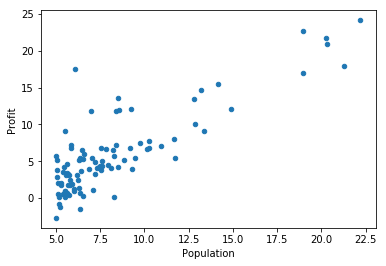

In [42]:
ori_one_variable.plot(kind='scatter', x='Population', y='Profit')

###### hypothesis

In [43]:
def hypothesis(theta, X):
    hyp = X @ theta    # np.dot(X, theta)
    return hyp

In [44]:
def cost_function(theta, X, y, method=0):
    global J_history

    err = hypothesis(theta, X) - y    # (m, )
    if method == 0:
        sum_err = err.T @ err
        cost = sum_err / (2 * m)
    elif method == 1:
        sum_err = np.sum(np.square(err))
        cost = sum_err / (2 * m)
    elif method == 2:
        cost = np.mean(np.square(err)) / 2
    J_history.append(cost)
    
    return cost


J_history = []
for i in range(3):
    theta = np.zeros((X_train.shape[1],))
    J_history = []
    cost = cost_function(theta, X_train, y_train, i)
    print("Cost : %.3f" % cost)

Cost : 32.073
Cost : 32.073
Cost : 32.073


In [45]:
def gradient(theta, X, y):
    err = hypothesis(theta, X) - y
    grad = (X.T @ err) / m
        
    return grad

In [9]:
def batch_gradient_descent(theta, X, y, lr=0.01, iterations=1500):
    global J_history
    J_history = []
    theta_history = []
    cost_function(theta, X, y)
    theta_history.append(list(theta))
    
    for _ in range(iterations):
        cost_function(theta, X, y)
        grad = gradient(theta, X, y)
        theta = theta - lr * grad
        theta_history.append(list(theta))
    
    return {
        "lr":lr,
        "iterations":iterations,
        "theta":theta,
        "cost_history":J_history.copy(),
        "theta_history":theta_history#.copy()
    }

In [46]:
theta = np.zeros((X_train.shape[1],))
results_batch_GD = []
res = batch_gradient_descent(theta, X_train, y_train)
results_batch_GD.append(res)
print("result_dict :\n\t", results_batch_GD[0].keys())
print("Batch Gradient Descent Theta :\n\t", results_batch_GD[0]["theta"])

result_dict :
	 dict_keys(['lr', 'iterations', 'theta', 'cost_history', 'theta_history'])
Batch Gradient Descent Theta :
	 [-3.63029144  1.16636235]


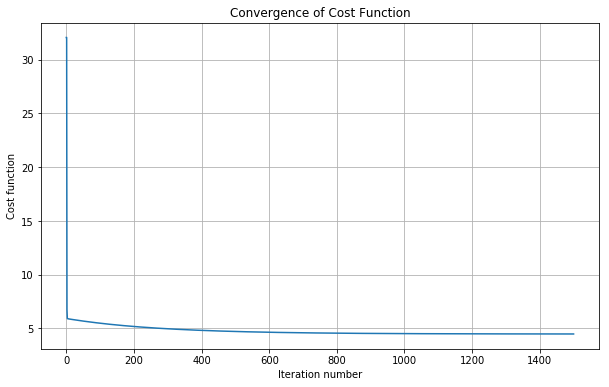

In [47]:
def plot_convergenct_curve(j_history):
    plt.figure(figsize=(10,6))
    plt.plot(np.arange(len(j_history)), j_history)
    #plt.scatter(np.arange(len(j_history)), j_history)
    plt.grid(True)
    plt.title("Convergence of Cost Function")
    plt.xlabel("Iteration number")
    plt.ylabel("Cost function")
    
plot_convergenct_curve(results_batch_GD[0]["cost_history"])
#plot_convergenct_curve(results_scipy[0]["cost_history"])
#plot_convergenct_curve(results_scipy[1]["cost_history"])

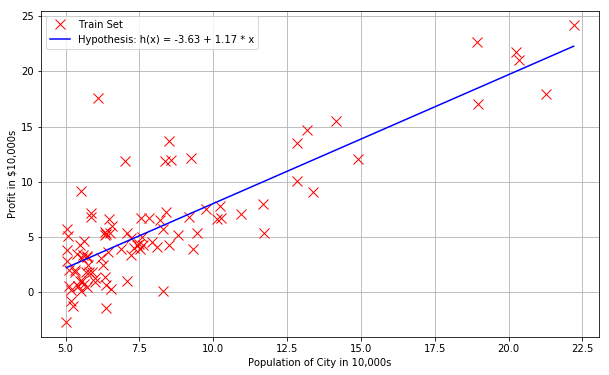

In [48]:
def plot_fit_curve(predict_x, predict_y, theta):
    plt.figure(figsize=(10,6))
    plt.plot(X_train[:,1:], y_train, 'rx', markersize=10, label='Train Set')
    plt.plot(predict_x, predict_y, 'b-', label='Hypothesis: h(x) = %0.2f + %0.2f * x' % (theta[0], theta[1]))
    plt.grid(True)
    plt.ylabel('Profit in $10,000s')
    plt.xlabel('Population of City in 10,000s')
    plt.legend()
    plt.show()


predict_x = np.linspace(X_train[:,1].min(), X_train[:,1].max(), 100).reshape((-1,1))
predict_x = np.insert(predict_x, 0, 1, axis=1)
theta = results_batch_GD[0]['theta']
predict_y = hypothesis(theta, predict_x)
plot_fit_curve(predict_x[:,1], predict_y, theta)

# Linear Regression With Multiple Variables

In [49]:
path = "dataset/ex1data2.txt"
ori_mul_variable = pd.read_csv(path, names=['Size', 'Bedrooms','Price'])
print("> ori_mul_variable.shape", ori_mul_variable.shape)
ori_mul_variable.head()

> ori_mul_variable.shape (47, 3)


,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [50]:
ori_mul_variable.shape

(47, 3)

In [51]:
ori_mul_variable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
Size        47 non-null int64
Bedrooms    47 non-null int64
Price       47 non-null int64
dtypes: int64(3)
memory usage: 1.2 KB


In [52]:
ori_mul_variable.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


###### Feature Normalization

In [53]:
dataset = ori_mul_variable.copy()
dataset_norm = (dataset.iloc[:,:-1] - dataset.iloc[:,:-1].mean()) / dataset.iloc[:,:-1].std()
dataset_norm["Price "] = dataset.iloc[:,-1]
dataset_norm.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,399900
1,-0.504190,-0.223675,329900
2,0.502476,-0.223675,369000
3,-0.735723,-1.537767,232000
4,1.257476,1.090417,539900


###### add 1's columns of one to dataset

In [54]:
train_set = add_intercept(dataset_norm)
train_set.head()

,Ones,Size,Bedrooms,Price
0,1,0.130010,-0.223675,399900
1,1,-0.504190,-0.223675,329900
2,1,0.502476,-0.223675,369000
3,1,-0.735723,-1.537767,232000
4,1,1.257476,1.090417,539900


###### get train data

In [55]:
X_train, y_train, m = get_train_data(train_set)

> X_train.shape :  (47, 3)
> y_train.shape :  (47,)
> Sample :  47


In [56]:
X_ori, y_ori, _ = get_train_data(ori_mul_variable)

> X_train.shape :  (47, 2)
> y_train.shape :  (47,)
> Sample :  47


###### plot original data

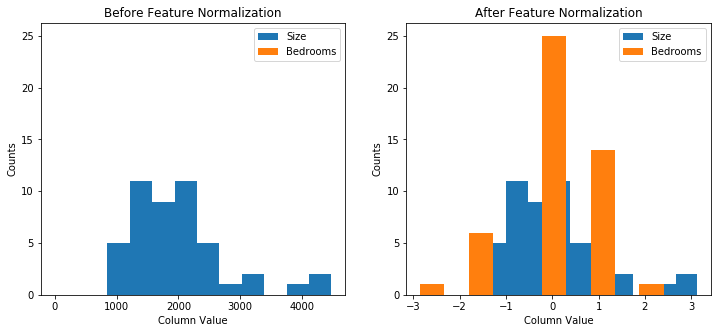

In [21]:
# > hist
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.hist(dataset["Size"], label="Size")
plt.hist(dataset["Bedrooms"], label="Bedrooms")
plt.title('Before Feature Normalization')
plt.xlabel('Column Value')
plt.ylabel('Counts')
plt.legend()

plt.subplot(1,2,2)
plt.hist(dataset_norm["Size"], label="Size")
plt.hist(dataset_norm["Bedrooms"], label="Bedrooms")
plt.title('After Feature Normalization')
plt.xlabel('Column Value')
plt.ylabel('Counts')
plt.legend()

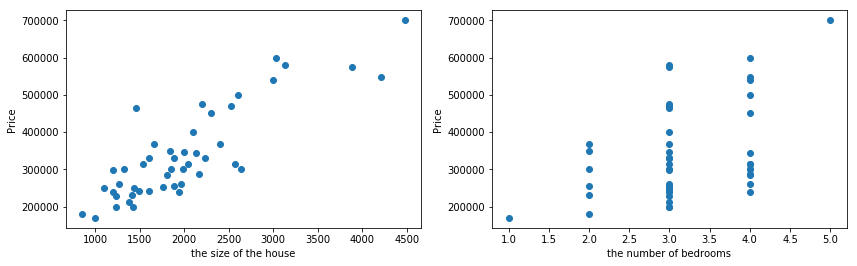

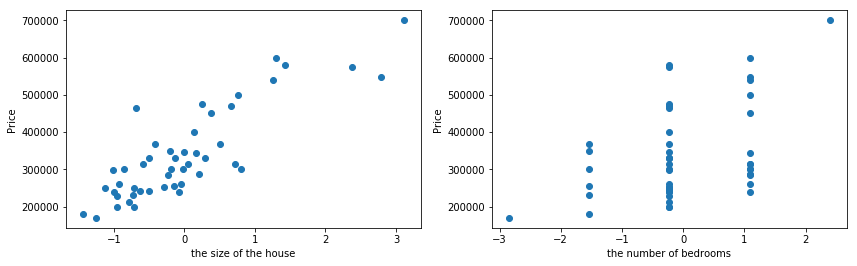

In [22]:
def plot_multi_variable(X, y):
    plt.figure(figsize=(14,4))
    plt.subplot(1,2,1)
    plt.scatter(X[:,0], y)
    plt.ylabel('Price')
    plt.xlabel('the size of the house')

    plt.subplot(1,2,2)
    plt.scatter(X[:,1], y)
    plt.ylabel('Price')
    plt.xlabel('the number of bedrooms')

plot_multi_variable(X_ori, y_ori)
plot_multi_variable(X_train[:,1:], y_train)

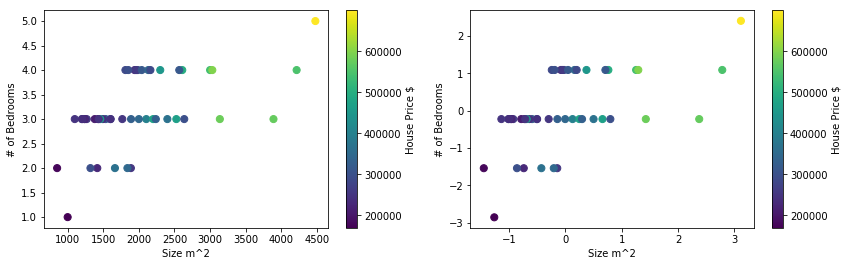

In [23]:
def plot_colorbar(X, y):
    sc = plt.scatter(X[:,0],X[:,1], c = y, s= 50)
    cb = plt.colorbar(sc)
    cb.ax.set_ylabel('House Price $')
    plt.xlabel('Size m^2')
    plt.ylabel('# of Bedrooms')

plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plot_colorbar(X_ori, y_ori)
plt.subplot(1,2,2)
plot_colorbar(X_train[:,1:], y_train)

###### Trainning

In [65]:
X_train, y_train, m = get_train_data(train_set)

> X_train.shape :  (47, 3)
> y_train.shape :  (47,)
> Sample :  47


###### Trainning - batch gradient descent

In [57]:
theta = np.zeros((X_train.shape[1],))
results_batch_GD = []
res = batch_gradient_descent(theta, X_train, y_train)
results_batch_GD.append(res)
print("result_dict :\n\t", results_batch_GD[0].keys())
print("Batch Gradient Descent Theta :\n\t", results_batch_GD[0]["theta"])

result_dict :
	 dict_keys(['lr', 'iterations', 'theta', 'cost_history', 'theta_history'])
Batch Gradient Descent Theta :
	 [340412.56301439 110540.56654627  -6558.99054811]


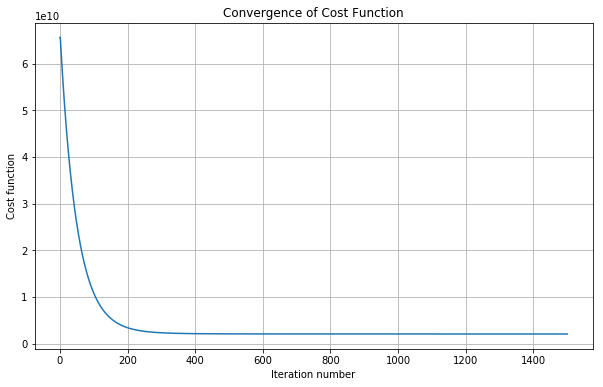

In [58]:
plot_convergenct_curve(results_batch_GD[0]["cost_history"])

In [67]:
results_batch_GD[0]["theta"]

array([340412.56301439, 110540.56654627,  -6558.99054811])

###### Trainning - scipy

In [60]:
def scipy_optimizer(theta, X, y, Method):
    res = opt.minimize(
        fun    = cost_function,
        x0     = theta,
        args   = (X, y),
        method = Method,
        jac    = gradient
    )
    
    return {
        "theta" : res.x,
        "cost_history" : J_history.copy()
    }

In [61]:
optimizer_dict = {
    "BFGS" : "BFGS",
    "TNC"  : "TNC"
}

results_scipy = []
for name in optimizer_dict:
    J_history = []
    theta = np.zeros((X_train.shape[1],))
    res = scipy_optimizer(theta, X_train, y_train, optimizer_dict[name])
    res['name'] = name
    results_scipy.append(res)

In [70]:
for res in results_scipy:
    print("Method %s" % res['name'])    
    print("> theta", ' '.join('%.3f' % i for i in res['theta']), '\n')
    #print("> cost_history\n", ' '.join('%.3f' % i for i in res['cost_history']), "\n")

Method BFGS
> theta 340412.660 110631.050 -6649.474 

Method TNC
> theta 340412.660 110631.050 -6649.474 



###### Trainning - sklearn

In [63]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)
print("> model.intercept_", model.intercept_)
print("> model.coef_", model.coef_)

> model.intercept_ 0.0
> model.coef_ [340412.65957447 110631.05027885  -6649.47427082]


###### Trainning - fmin_bfgs

In [72]:
theta = np.zeros((X_train.shape[1],))
theta, theta_history = opt.fmin_bfgs(cost_function, theta, fprime=gradient, 
                                     args=(X_train, y_train), retall=True, disp=True)

         Current function value: 2043280050.602828
         Iterations: 8
         Function evaluations: 75
         Gradient evaluations: 63


> fmin_bfgs - theta : [340412.65954721 110631.05032881  -6649.47430645]


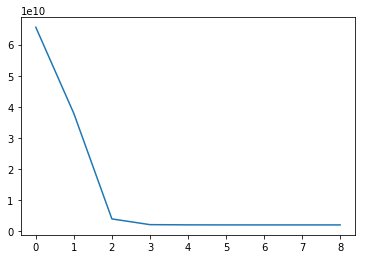

In [75]:
J = []
print("> fmin_bfgs - theta :", theta)
for i in theta_history:
    T = cost_function(i.reshape((-1,)), X_train, y_train)
    J.append(T)

plt.plot(np.arange(len(J)), J)

###### do predict

In [76]:
X_test = pd.DataFrame({
    'Size':1650,
    'Bedrooms':3
}, index=['0'])
X_test_norm = (X_test - dataset.iloc[:,:-1].mean()) / dataset.iloc[:,:-1].std()
X_test_norm

,Size,Bedrooms
0,-0.441273,-0.223675


In [77]:
X_test_norm = np.insert(X_test_norm.values, 0, 1, axis=1)
X_test_norm

array([[ 1.        , -0.4412732 , -0.22367519]])

In [79]:
prediction = hypothesis(theta ,X_test_norm)
print('Prediction :', prediction)

Prediction : [293081.46429356]
